# Project: Howie's Hotel Data Wrangling Project

## Project Overview

Howie is currently under investigation by the FBI. It turns out he's been cooking the books—making up records for hotel stays that never happened—in order to launder money from his illegal endangered baby rhino smuggling operation.

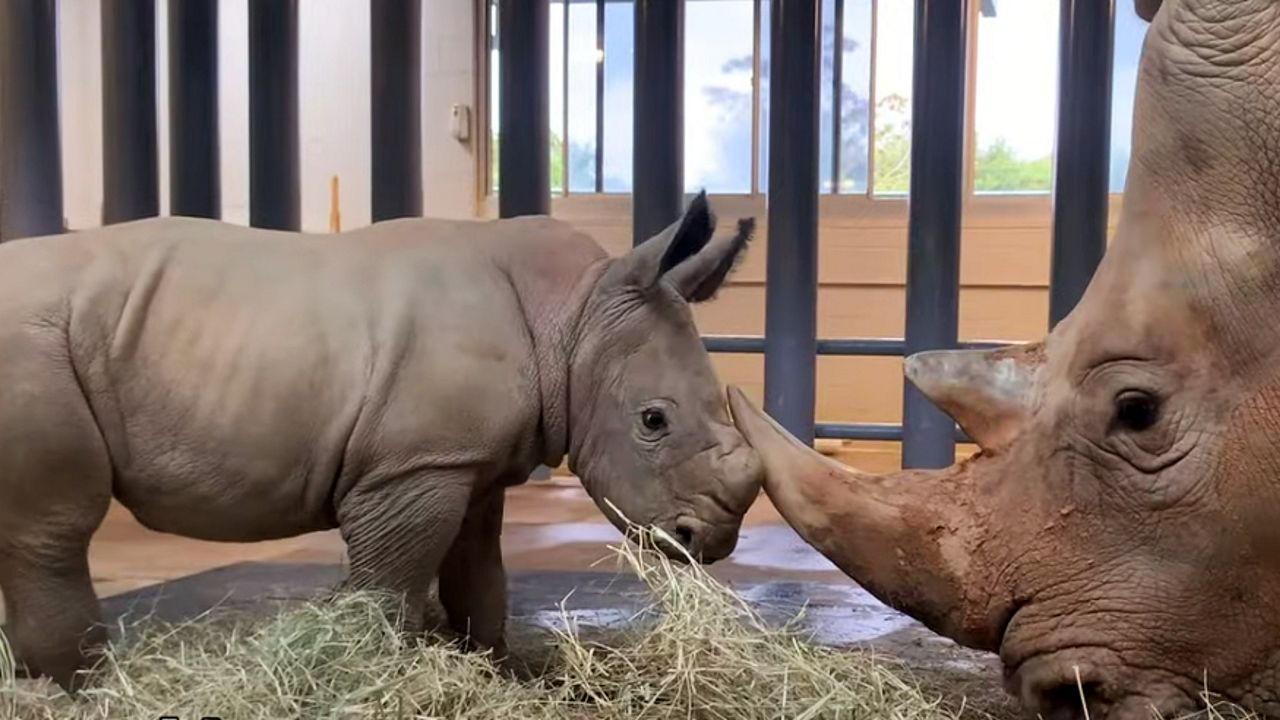


[MyNews13](https://www.mynews13.com/fl/orlando/attractions/2021/01/12/baby-rhino-at-disneys-animal-kingdom-given-name) (accessed 11/28/2022)

## Goal
* Find the 10 falsified records in Howie's database and determine how much endangered baby rhino money he has laundered.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
hotel_evidence = pd.read_csv('hotel_evidence.csv')
hotel_evidence.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel          0.0      342.0             2015.0               July   
1  Resort Hotel          0.0      737.0             2015.0               July   
2  Resort Hotel          0.0        7.0             2015.0               July   
3  Resort Hotel          0.0       13.0             2015.0               July   
4  Resort Hotel          0.0       14.0             2015.0               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                      27.0                        1.0   
1                      27.0                        1.0   
2                      27.0                        1.0   
3                      27.0                        1.0   
4                      27.0                        1.0   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  company  \
0                      0.0                   0.0     2.0  ...      NaN   
1                      0.0                   0.0     2.0  ...      NaN   
2                      0.0                   1.0     1.0  ...      NaN   
3                      0.0                   1.0     1.0  ...      NaN   
4                      0.0                   2.0     2.0  ...      NaN   

   days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                   0.0     Transient   0.0                         0.0   
1                   0.0     Transient   0.0                         0.0   
2                   0.0     Transient  75.0                         0.0   
3                   0.0     Transient  75.0                         0.0   
4                   0.0     Transient  98.0                         0.0   

  total_of_special_requests  reservation_status  reservation_status_date  \
0                       0.0           Check-Out                   7/1/15   
1                       0.0           Check-Out                   7/1/15   
2                       0.0           Check-Out                   7/2/15   
3                       0.0           Check-Out                   7/2/15   
4                       1.0           Check-Out                   7/3/15   

   booking_number total_charges  
0       1000000.0           0.0  
1       1000001.0           0.0  
2       1000002.0          75.0  
3       1000003.0          75.0  
4       1000004.0         196.0  

[5 rows x 34 columns]

In [3]:
# Setting up an indicator variables to identify falsified records.
is_false = 0
is_true = 1
hotel_evidence['is_false'] = is_false
hotel_evidence['is_false'].describe()

count    119390.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: is_false, dtype: float64

In [4]:
# Determining the records in the booking_number column that does not fit
# the pattern of the numbering system
hotel_evidence['booking_number'].describe()

count    1.193890e+05
mean     1.059769e+06
std      4.309612e+04
min      1.000000e+06
25%      1.029848e+06
50%      1.059695e+06
75%      1.089542e+06
max      9.999999e+06
Name: booking_number, dtype: float64

From the describe output above, it seems that the maximum value for booking number of "9999999.0" differ drastically from the other booking numbers. This is considered to be the outlier! 

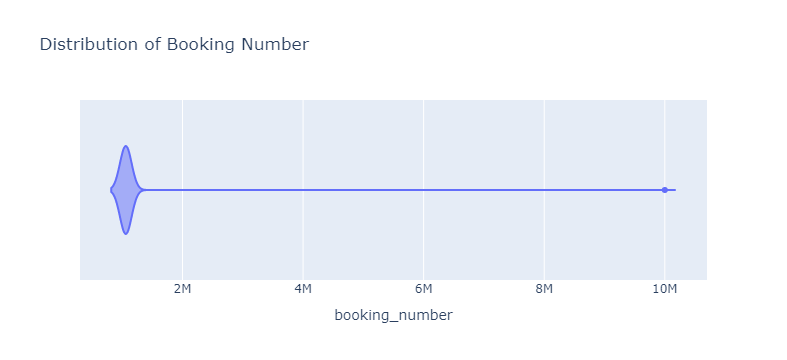

In [5]:
fig = px.violin(data_frame = hotel_evidence, x = "booking_number", title = "Distribution of Booking Number")
fig.update_layout(height = 300, width = 350)
fig.show()

**NOTE:** From the boxplot above, we see that there is an outlier in the booking_number column, where the the booking number is "9999999.0".

In [6]:
# Identifying the falsified booking_number record
hotel_evidence.loc[hotel_evidence['booking_number'] > 1119389, 'is_false'] = is_true

<AxesSubplot:xlabel='arrival_date_week_number'>

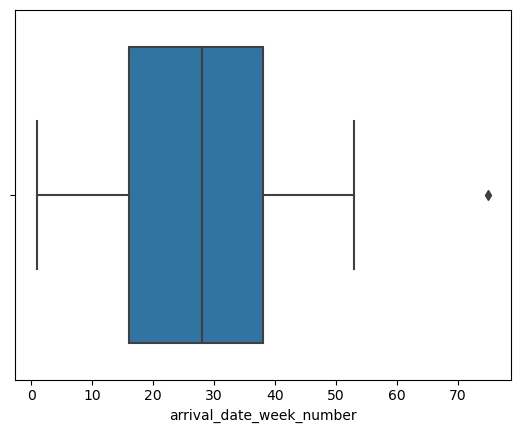

In [7]:
hotel_evidence['arrival_date_week_number'].describe()
sns.boxplot(data = hotel_evidence, x = "arrival_date_week_number")

From the above boxplot, there seems to be an week number greter than 52. That seems to be suspicious!

In [8]:
# Falsify the record in which there is a week number greater than 52
hotel_evidence.loc[hotel_evidence['arrival_date_week_number'] == 75.0, 'is_false'] = is_true

In [9]:
hotel_evidence['arrival_date_day_of_month'].value_counts()
pd.crosstab(hotel_evidence['arrival_date_month'], hotel_evidence['arrival_date_day_of_month'])

arrival_date_day_of_month  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
arrival_date_month                                                          
April                       236   198   331   336   367   466   324   382   
August                      502   337   503   389   460   381   472   555   
December                    231   257   272   210   590   158   146   431   
February                    215   200   206   259   217   327   207   159   
January                     172   362   186   173   145   161   132   169   
July                        479   373   348   432   300   457   409   355   
June                        361   520   416   297   281   368   294   537   
March                       267   495   245   300   315   224   277   214   
May                         296   437   306   396   531   349   285   369   
November                    269   220   299   306   274   223   477   141   
October                     305   354   410   341   412   468   376   293   
September                   293   302   333   324   425   251   266   316   

arrival_date_day_of_month  9.0   10.0  ...  22.0  23.0  24.0  25.0  26.0  \
arrival_date_month                     ...                                 
April                       502   306  ...   486   340   298   260   443   
August                      351   493  ...   424   321   459   486   458   
December                    268   180  ...   197   190   214   140   276   
February                    221   266  ...   278   238   256   470   429   
January                     131   145  ...   223   242   123   270   183   
July                        431   343  ...   458   483   406   518   323   
June                        446   334  ...   282   327   440   260   413   
March                       353   283  ...   247   274   487   369   233   
May                         388   311  ...   328   294   487   416   457   
November                    158   197  ...   115   317   189   238   176   
October                     424   463  ...   263   291   296   303   253   
September                   422   254  ...   295   299   338   430   502   

arrival_date_day_of_month  27.0  28.0  29.0  30.0  31.0  
arrival_date_month                                       
April                       376   553   596   362     0  
August                      415   462   398   322   377  
December                    338   249   318   476   199  
February                    344   296    96     0     1  
January                     305   197   157   169   107  
July                        470   356   367   442   365  
June                        386   357   254   376     0  
March                       288   257   273   345   451  
May                         229   322   330   427   371  
November                    213   179   129   123     0  
October                     247   475   369   320   338  
September                   191   243   293   491     0  

[12 rows x 31 columns]

<AxesSubplot:xlabel='arrival_date_day_of_month', ylabel='arrival_date_month'>

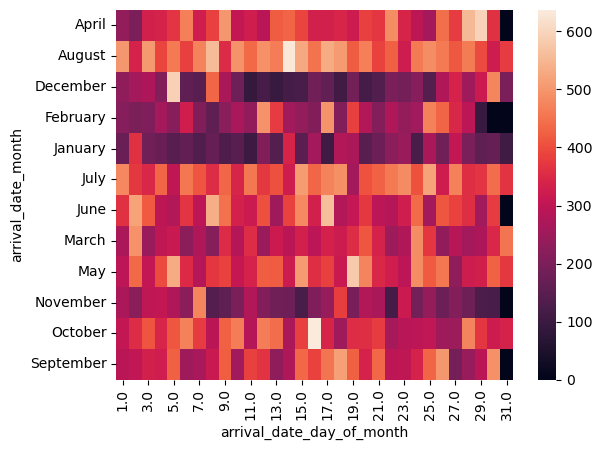

In [10]:
sns.heatmap(pd.crosstab(hotel_evidence['arrival_date_month'], hotel_evidence['arrival_date_day_of_month']))

From the above table, there seems to be a "1" in day 31 of the month February! We'll have to falsify that record!

In [11]:
hotel_evidence.loc[(hotel_evidence['arrival_date_month'] == 'February') & (hotel_evidence['arrival_date_day_of_month'] == 31), 'is_false'] = is_true

There seems to be records where unaccompanied babies booked stays at the hotel. We'll have to falsify a record where any children or babies booked a stay without adults present.

In [12]:
adults = hotel_evidence['adults']
children = hotel_evidence['children']
babies = hotel_evidence['babies']
hotel_evidence['kids'] = children + babies
kids = hotel_evidence['kids']
pd.crosstab(adults, kids)

kids     0.0   1.0   2.0   3.0   9.0   10.0
adults                                     
0.0       180     4   205    14     0     1
1.0     22577   286   157     6     1     0
2.0     81557  4658  3368    91     0     1
3.0      5665   495    41     0     0     0
4.0        59     3     0     0     0     0
5.0         2     0     0     0     0     0
6.0         1     0     0     0     0     0
10.0        1     0     0     0     0     0
20.0        2     0     0     0     0     0
26.0        5     0     0     0     0     0
27.0        2     0     0     0     0     0
40.0        1     0     0     0     0     0
50.0        1     0     0     0     0     0
55.0        1     0     0     0     0     0

From the above table, there seems to be one, two, even three children (and/or babies) where there are **zero** adults were present! Those records will need to be falsified.

In [13]:
hotel_evidence.loc[(adults == 0) & (children > 0) & (babies > 0), 'is_false'] = is_true

All of the records are *supposed* to document stays of **consecutive** days. SO if someone statyed for six weekdays, they should have stayed for at least *two* weekend days. If someone stayed for 3 or more weekend days, there ought to be some weekdays in there too.

Those records will have to be falsified!

In [14]:
week_stay = hotel_evidence['stays_in_week_nights']
weekend_stay = hotel_evidence['stays_in_weekend_nights']
pd.crosstab(week_stay, weekend_stay)

stays_in_weekend_nights   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   \
stays_in_week_nights                                                       
0.0                        715  4569  2361     0     0     0     0     0   
1.0                      16451  7326  6533     0     0     0     0     0   
2.0                      17955  8979  6749     0     0     0     0     0   
3.0                      11564  6152  4542     0     0     0     0     0   
4.0                       4482  2412  2669     0     0     0     0     0   
5.0                        830  1188  8655   310    94     0     0     0   
6.0                          0     0   851   301   347     0     0     0   
7.0                          0     0   446   399   184     0     0     0   
8.0                          0     0   393   131   132     0     0     0   
9.0                          0     0    81    63    87     0     0     0   
10.0                         0     0    28    55   916    36     1     0   
11.0                         1     0     0     0    38    15     2     0   
12.0                         0     0     0     0    24     7    11     0   
13.0                         0     0     0     0    11     5    11     0   
14.0                         0     0     0     0    19     9     7     0   
15.0                         0     0     0     0     2     7    71     5   
16.0                         0     0     0     0     0     0     9     5   
17.0                         0     0     0     0     0     0     3     1   
18.0                         0     0     0     0     0     0     3     2   
19.0                         0     0     0     0     0     0    35     5   
20.0                         0     0     0     0     0     0     0     1   
21.0                         0     0     0     0     0     0     0     0   
22.0                         0     0     0     0     0     0     0     0   
24.0                         0     0     0     0     0     0     0     0   
25.0                         0     0     0     0     0     0     0     0   
26.0                         0     0     0     0     0     0     0     0   
30.0                         0     0     0     0     0     0     0     0   
32.0                         0     0     0     0     0     0     0     0   
33.0                         0     0     0     0     0     0     0     0   
34.0                         0     0     0     0     0     0     0     0   
35.0                         0     0     0     0     0     0     0     0   
40.0                         0     0     0     0     0     0     0     0   
41.0                         0     0     0     0     0     0     0     0   
42.0                         0     0     0     0     0     0     0     0   
50.0                         0     0     0     0     0     0     0     0   

stays_in_weekend_nights  8.0   9.0   10.0  12.0  13.0  14.0  16.0  18.0  19.0  
stays_in_week_nights                                                           
0.0                         1     0     0     0     0     0     0     0     0  
1.0                         0     0     0     0     0     0     0     0     0  
2.0                         0     0     0     0     0     0     0     0     0  
3.0                         0     0     0     0     0     0     0     0     0  
4.0                         0     0     0     0     0     0     0     0     0  
5.0                         0     0     0     0     0     0     0     0     0  
6.0                         0     0     0     0     0     0     0     0     0  
7.0                         0     0     0     0     0     0     0     0     0  
8.0                         0     0     0     0     0     0     0     0     0  
9.0                         0     0     0     0     0     0     0     0     0  
10.0                        0     0     0     0     0     0     0     0     0  
11.0                        0     0     0     0     0     0     0     0     0  
12.0                        0     0     0     0     0     0     0  

In [15]:
hotel_evidence.loc[((weekend_stay >= 3) & (week_stay == 0)) & ((week_stay == 6) & (weekend_stay >= 2)), 'is_false'] = is_true

In [16]:
#Re-calculate total charges by multiplying adr * (weeknight stays + weekend stays)
#We'll round our answer to two decimals.  Sometimes when try to compare unrounded calculations
#in Python, Python will "think" they are unequal when they aren't.  You can try repeating the exercise
#without rounding to see what happens

hotel_evidence['check'] = round(hotel_evidence['adr']* (hotel_evidence['stays_in_week_nights'] + hotel_evidence['stays_in_weekend_nights']),2)

#Round the total charges variable as well

hotel_evidence['total_charges_rounded'] = round(hotel_evidence['total_charges'],2)

#Print the 5 records where the calculated charges don't match what is recorded in the spreadsheet
print(hotel_evidence[hotel_evidence['check'] != hotel_evidence['total_charges_rounded']])

#Identify the records 
hotel_evidence.loc[ hotel_evidence['check'] != hotel_evidence['total_charges_rounded'], ['is_false']] = 1

               hotel  is_canceled  lead_time  arrival_date_year  \
232              NaN          NaN        NaN                NaN   
35213   Resort Hotel          0.0       11.0             2017.0   
112930    City Hotel          0.0      223.0             2017.0   
118963    City Hotel          0.0        1.0             2017.0   
119386    City Hotel          0.0      102.0             2017.0   

       arrival_date_month  arrival_date_week_number  \
232                   NaN                       NaN   
35213               April                      15.0   
112930                May                      20.0   
118963             August                      35.0   
119386             August                      35.0   

        arrival_date_day_of_month  stays_in_weekend_nights  \
232                           NaN                      NaN   
35213                        11.0                      0.0   
112930                       16.0                      0.0   
118963            

In [17]:
false_records = hotel_evidence.loc[(hotel_evidence['is_false']) == is_true]
false_records

hotel  is_canceled  lead_time  arrival_date_year  \
232              NaN          NaN        NaN                NaN   
19085   Resort Hotel          0.0       11.0             2015.0   
35213   Resort Hotel          0.0       11.0             2017.0   
46150     City Hotel          0.0        6.0             2015.0   
81375     City Hotel          1.0       22.0             2015.0   
90790     City Hotel          0.0       14.0             2016.0   
106962    City Hotel          0.0        9.0             2017.0   
112930    City Hotel          0.0      223.0             2017.0   
118963    City Hotel          0.0        1.0             2017.0   
119385    City Hotel          0.0       23.0             2017.0   
119386    City Hotel          0.0      102.0             2017.0   

       arrival_date_month  arrival_date_week_number  \
232                   NaN                       NaN   
19085            December                      75.0   
35213               April                      15.0   
46150            December                      51.0   
81375            December                      50.0   
90790                June                      24.0   
106962           February                       9.0   
112930                May                      20.0   
118963             August                      35.0   
119385             August                      35.0   
119386             August                      35.0   

        arrival_date_day_of_month  stays_in_weekend_nights  \
232                           NaN                      NaN   
19085                         5.0                      2.0   
35213                        11.0                      0.0   
46150                        18.0                      0.0   
81375                         9.0                      1.0   
90790                         9.0                      0.0   
106962                       31.0                      2.0   
112930                       16.0                      0.0   
118963                       27.0                      0.0   
119385                       30.0                      2.0   
119386                       31.0                      2.0   

        stays_in_week_nights  adults  ...  required_car_parking_spaces  \
232                      NaN     NaN  ...                          NaN   
19085                    1.0     2.0  ...                          0.0   
35213                    5.0     2.0  ...                          0.0   
46150                    1.0     0.0  ...                          0.0   
81375                    4.0     0.0  ...                          0.0   
90790                    3.0     0.0  ...                          0.0   
106962                   5.0     1.0  ...                          0.0   
112930                  11.0     2.0  ...                          0.0   
118963                   0.0     2.0  ...                          0.0   
119385                   5.0     2.0  ...                          0.0   
119386                   5.0     3.0  ...                          0.0   

        total_of_special_requests reservation_status reservation_status_date  \
232                           NaN                NaN                     NaN   
19085                         0.0          Check-Out                 12/8/15   
35213                         1.0          Check-Out                 4/16/17   
46150                         2.0          Check-Out                12/19/15   
81375                         1.0            No-Show                 12/9/15   
90790                         2.0          Check-Out                 6/12/16   
106962                        0.0          Check-Out                  3/5/17   
112930                        1.0          Check-Out                 5/31/17   
118963                        0.0          Check-Out                 8/27/17   
119385                        0.0          Check-Out                  9/6/17   
119386                        2.0  

In [18]:
false_records.dropna(subset = ['booking_number'])

hotel  is_canceled  lead_time  arrival_date_year  \
19085   Resort Hotel          0.0       11.0             2015.0   
35213   Resort Hotel          0.0       11.0             2017.0   
46150     City Hotel          0.0        6.0             2015.0   
81375     City Hotel          1.0       22.0             2015.0   
90790     City Hotel          0.0       14.0             2016.0   
106962    City Hotel          0.0        9.0             2017.0   
112930    City Hotel          0.0      223.0             2017.0   
118963    City Hotel          0.0        1.0             2017.0   
119385    City Hotel          0.0       23.0             2017.0   
119386    City Hotel          0.0      102.0             2017.0   

       arrival_date_month  arrival_date_week_number  \
19085            December                      75.0   
35213               April                      15.0   
46150            December                      51.0   
81375            December                      50.0   
90790                June                      24.0   
106962           February                       9.0   
112930                May                      20.0   
118963             August                      35.0   
119385             August                      35.0   
119386             August                      35.0   

        arrival_date_day_of_month  stays_in_weekend_nights  \
19085                         5.0                      2.0   
35213                        11.0                      0.0   
46150                        18.0                      0.0   
81375                         9.0                      1.0   
90790                         9.0                      0.0   
106962                       31.0                      2.0   
112930                       16.0                      0.0   
118963                       27.0                      0.0   
119385                       30.0                      2.0   
119386                       31.0                      2.0   

        stays_in_week_nights  adults  ...  required_car_parking_spaces  \
19085                    1.0     2.0  ...                          0.0   
35213                    5.0     2.0  ...                          0.0   
46150                    1.0     0.0  ...                          0.0   
81375                    4.0     0.0  ...                          0.0   
90790                    3.0     0.0  ...                          0.0   
106962                   5.0     1.0  ...                          0.0   
112930                  11.0     2.0  ...                          0.0   
118963                   0.0     2.0  ...                          0.0   
119385                   5.0     2.0  ...                          0.0   
119386                   5.0     3.0  ...                          0.0   

        total_of_special_requests reservation_status reservation_status_date  \
19085                         0.0          Check-Out                 12/8/15   
35213                         1.0          Check-Out                 4/16/17   
46150                         2.0          Check-Out                12/19/15   
81375                         1.0            No-Show                 12/9/15   
90790                         2.0          Check-Out                 6/12/16   
106962                        0.0          Check-Out                  3/5/17   
112930                        1.0          Check-Out                 5/31/17   
118963                        0.0          Check-Out                 8/27/17   
119385                        0.0          Check-Out                  9/6/17   
119386                        2.0          Check-Out                  9/7/17   

       booking_number total_charges  is_false  kids    check  \
19085       1019085.0        204.00         1   0.0   204.00   
35213       1035213.0       1000.00         1   0.0   414.25   
46150       1046150.0         77.00         1   3.0    77.00   
81375       1081375.0        403.75 

In [19]:
total_laundered = false_records['total_charges'].sum()
print('Howie laundered up to ${} dollars.'.format(total_laundered))

Howie laundered up to $105498.05 dollars.


In [20]:
false_records.to_csv('money_laundered.csv')